## Srovnání numerického řešení ode a analytického řešení mathi. rovnic

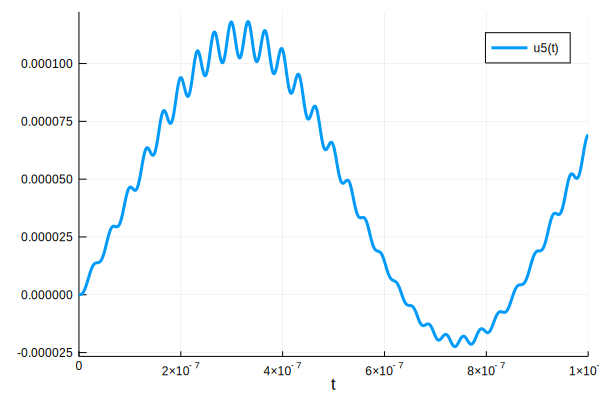

In [105]:
#using Plots
include("ion_traj.jl")

# parametry pasti
Vrf = 400  # napeti radialnich elektrod [V]
Udc = 1300  # napeti axialnich elektrod [V]
Ω = 2*pi * 30e6 # budici frekvence pasti [Hz]

# pocatecni podminky
u0 = [0, 0, 0,0,1e-8,0] # v metrech

# externi DC pole
E_ext = [0, 1000, 0]
delta_phi = [0,0.1,0]
tspan = (0.0, 1.0e-6)  # casovy rozsah reseni

traj = get_ion_traj(Vrf, Udc, Ω, E_ext, delta_phi, u0, tspan); # trajektorie iontu

#gr()
plot(traj, vars=(0,5))


Analytické řešení

In [106]:
include("mathi_traj_eext_phasediff.jl")


phi = [0,0,0]
tspan_an = range(0, 1e-6, length=601)
#u0 = [0, 0, 0, 1e-6,1e-7,1e-6] # v metrech

(u, Per_sec, E_kin_avg_an) = get_mathi_traj(Vrf, Udc, Ω, u0, E_ext, delta_phi, phi, tspan_an, div=false, sym_type=false);

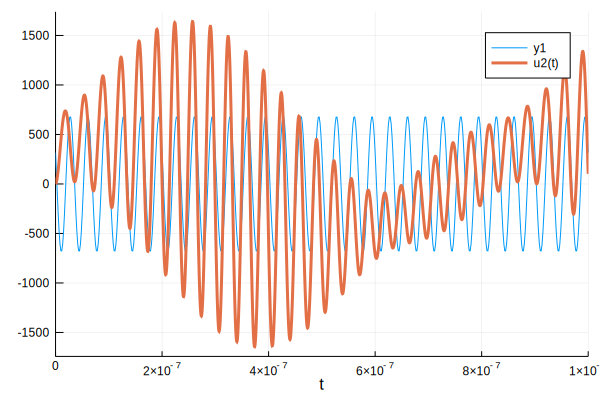

In [108]:
plot(tspan_an, u[:,2])
plot!( traj, vars=(0,2))

In [81]:
AtomicMassConstant 

Atomic mass constant (m_u)
Value                         = 1.6605390666e-27 kg
Standard uncertainty          = 5.0e-37 kg
Relative standard uncertainty = 3.0e-10
Reference                     = CODATA 2018